## Image Displays
This notebook is to be able to see the kinds of images that are being used for processing.

### Imports

In [1]:
from pathlib import Path
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Accessing the directory with the training images and creating a dataframe with the IDs and commodities.

In [2]:
folder = Path('train/70193655')
deposits = pd.read_csv(folder / 'commodities.csv')
deposits['geometry'] = list(zip(deposits.x, deposits.y))
deposits['geometry'] = deposits['geometry'].apply(Point)
deposits = gpd.GeoDataFrame(deposits)

In [3]:
deposits

,stamp_id,x,y,commodity,geometry
0,70193655,32.371423,-1075.753128,Au,POINT (32.371 -1075.753)
1,70193655,580.079992,-517.124313,Au,POINT (580.080 -517.124)
2,70193655,-1367.506758,-1535.227636,Au,POINT (-1367.507 -1535.228)
3,70193655,122.366343,-419.357202,Au,POINT (122.366 -419.357)
4,70193655,-1838.065779,-1429.055829,Au,POINT (-1838.066 -1429.056)
5,70193655,-1845.526075,2824.938275,Au;Sb,POINT (-1845.526 2824.938)
6,70193655,3115.377224,-2177.295119,Au,POINT (3115.377 -2177.295)


### Rasterio
The rasterio library is useful for processing geospatial images. We can see the images by accessing the ID and the subfolders.

In [7]:
import rasterio

tiffs = lambda folder: [f for f in folder.iterdir() if str(f).endswith('tif')]
tiff_to_imshow = lambda t: t.transpose()[:, ::-1]  # imshow uses a different convention for top-right-bottom-left

def plot_tiffs(tiffs):
    n_tiffs = len(tiffs)
    f, axes = plt.subplots(1, n_tiffs)
    f.set_size_inches(n_tiffs * 4, 4)
    for tiff, ax in zip(tiffs, axes):
        with rasterio.open(tiff, 'r') as src:
            ax.imshow(tiff_to_imshow(src.read(1)))
            ax.set_title(tiff.stem.replace('_', ' '))
    f.tight_layout()

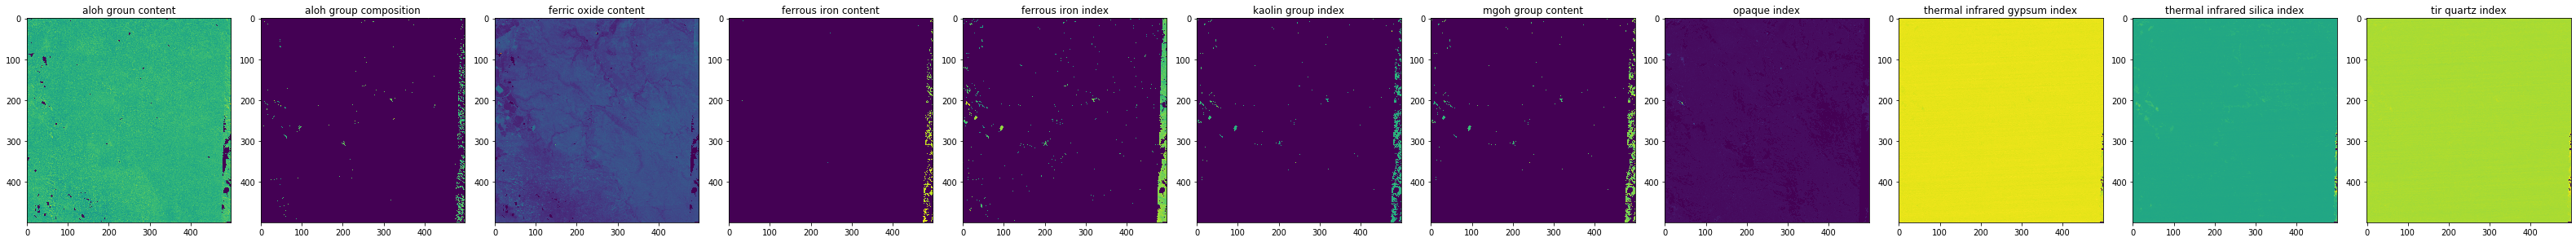

In [8]:
plot_tiffs(tiffs(folder / 'remote_sensing' / 'aster'))

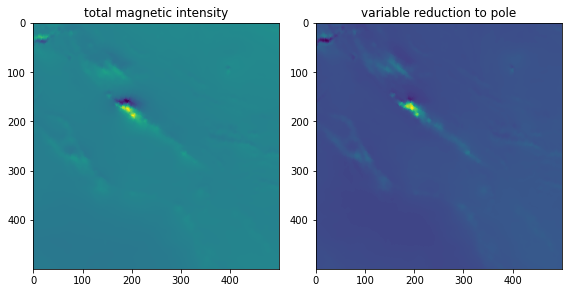

In [9]:
plot_tiffs(tiffs(folder / 'geophysics' / 'magnetics'))

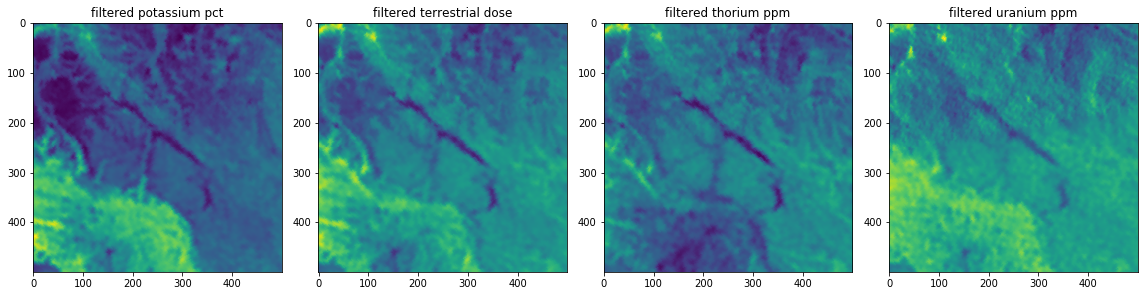

In [10]:
plot_tiffs(tiffs(folder / 'geophysics' / 'radiometrics'))

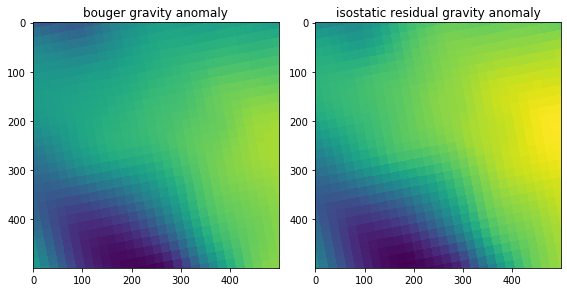

In [11]:
plot_tiffs(tiffs(folder / 'geophysics' / 'gravity'))